<a href="https://colab.research.google.com/github/aastha2003gupta/roadmap_to_ml/blob/main/audio_signalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
audio envelope feature
```



In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [ ]:
jack_file='/content/jackhammer.wav'
dow_file='/content/download.wav'

In [ ]:
ipd.Audio(jack_file)

In [ ]:
ipd.Audio(dow_file)

In [ ]:
jack,sr=librosa.load(jack_file)


In [ ]:
jack

array([-0.00420221, -0.02637046, -0.0093284 , ..., -0.02343493,
       -0.0462916 , -0.03545671], dtype=float32)

In [ ]:
jack.size

73795

In [ ]:
sample_duration=1/sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [ ]:
total_samples=len(jack)
total_samples

73795

In [ ]:
audio_duration=total_samples*sample_duration
print(f"The audio lasts for {audio_duration:4f} seconds")

The audio lasts for 3.346712 seconds


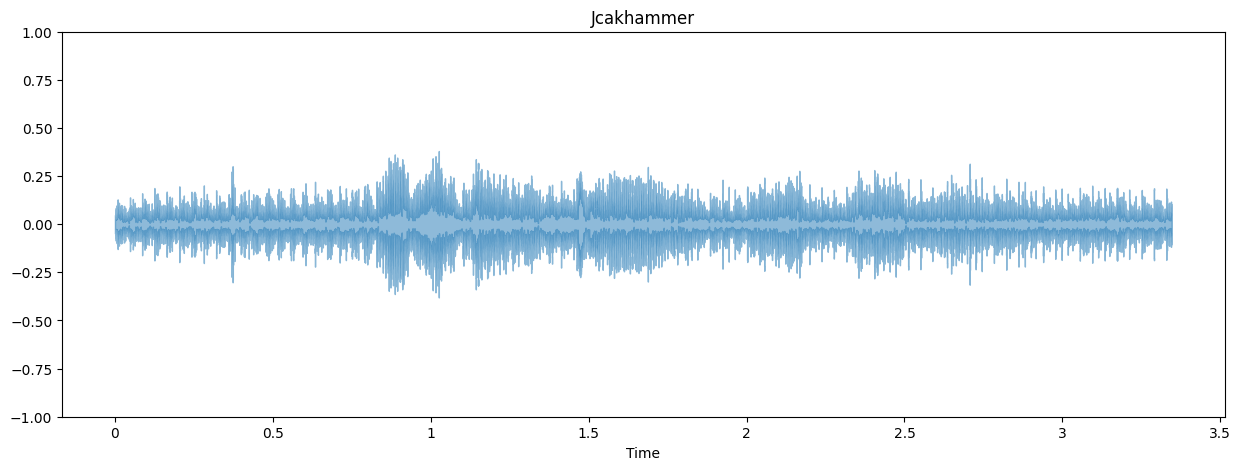

In [ ]:
#visualize waveform
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
librosa.display.waveshow(jack, alpha=0.5)
plt.title("Jcakhammer")
plt.ylim(-1,1)
plt.show()


In [ ]:
#calculating amplitude envelope
FRAME_SIZE=1024
HOP_LENGTH=512
def amplitude_envelope(signal,frame_size,hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal),hop_length)])

In [ ]:
ae_jack=amplitude_envelope(jack,FRAME_SIZE,HOP_LENGTH)
len(ae_jack)

145

In [ ]:
#visualising
frames=range(len(ae_jack))
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

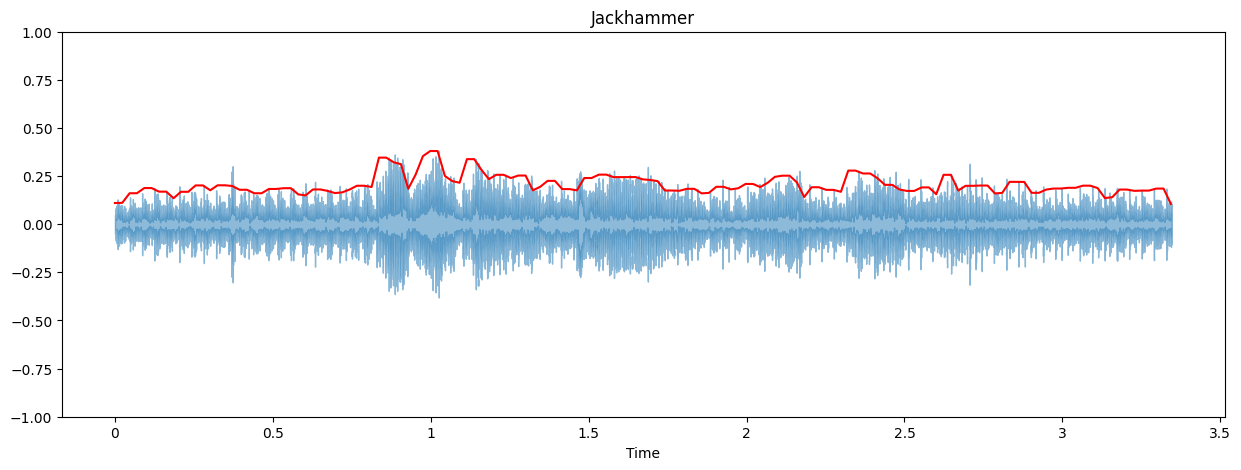

In [ ]:
plt.figure(figsize=(15,17))
ax=plt.subplot(3,1,1)
librosa.display.waveshow(jack,alpha=0.5)
plt.plot(t,ae_jack,color="r")
plt.ylim(-1,1)
plt.title("Jackhammer")
plt.show()

Root Mean Square Energy

In [ ]:
rms_jack = librosa.feature.rms(y=jack, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
#visualize
frames=range(len(rms_jack))
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

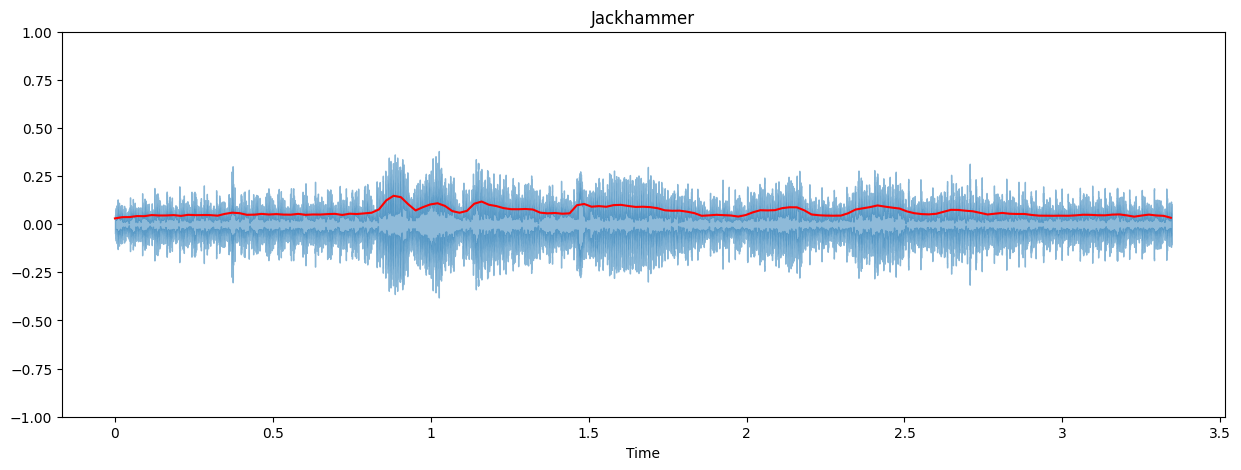

In [ ]:
plt.figure(figsize=(15,17))
ax=plt.subplot(3,1,1)
librosa.display.waveshow(jack,alpha=0.5)
plt.plot(t, rms_jack, color="r")
plt.ylim((-1, 1))
plt.title("Jackhammer")
plt.show()

Zero crossing rate

In [ ]:
zcr_jack=librosa.feature.zero_crossing_rate(y=jack, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
zcr_jack.size

145

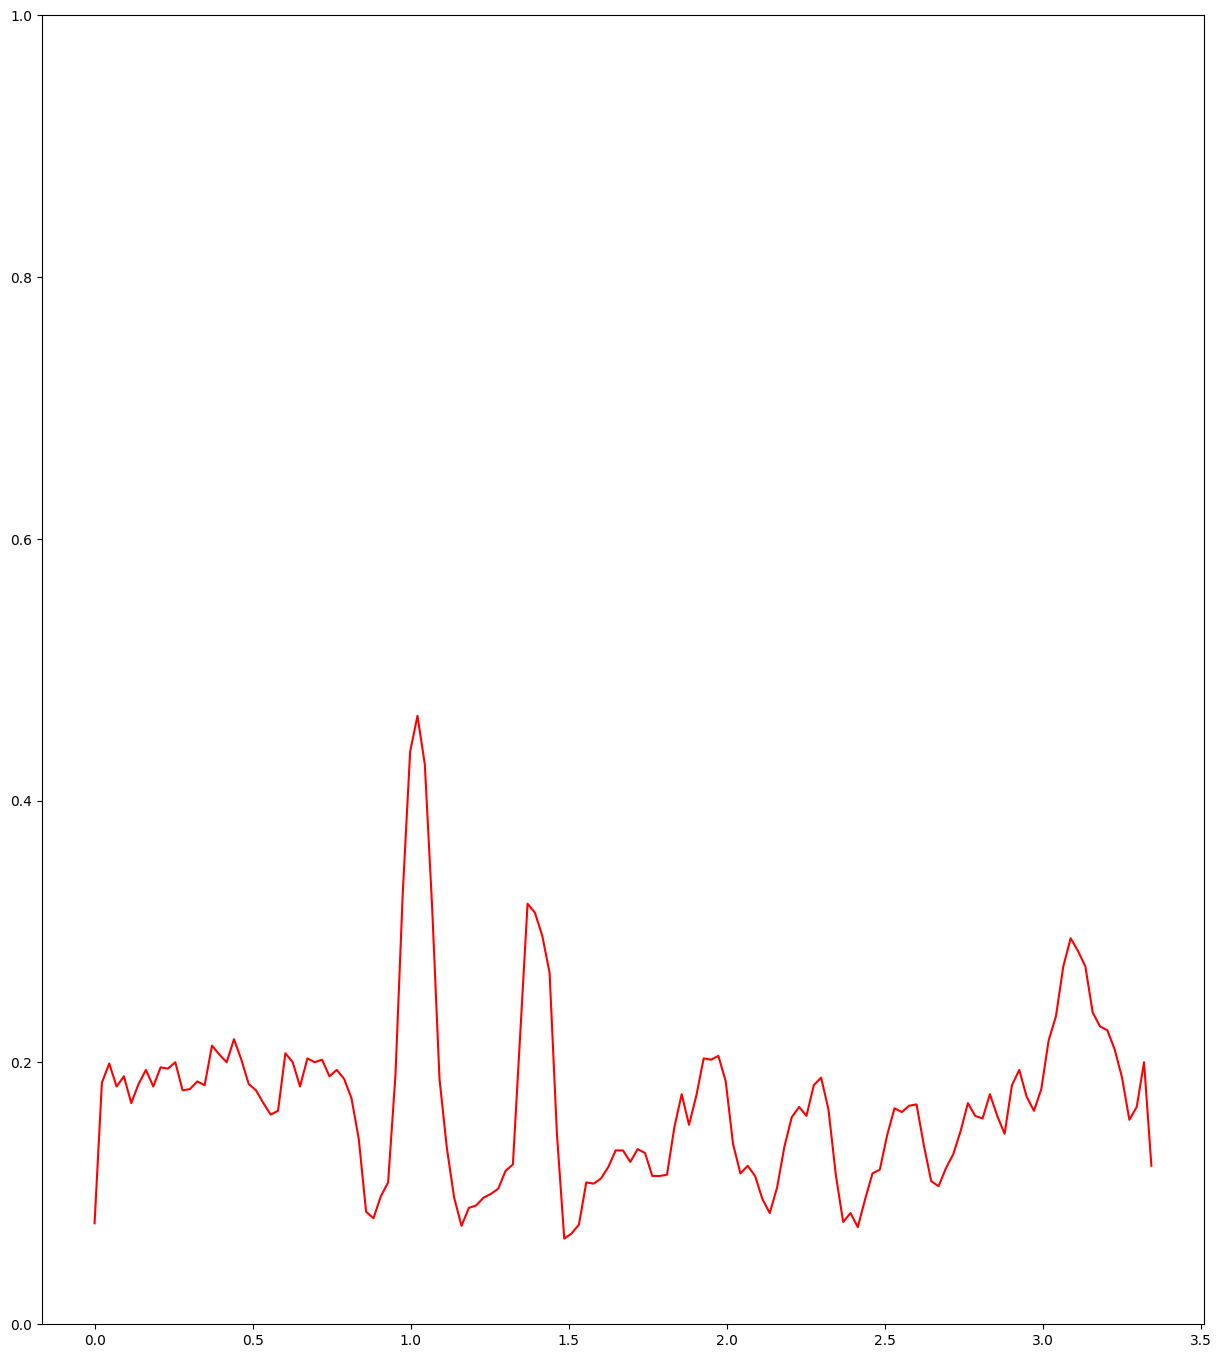

In [ ]:
#visualizing
plt.figure(figsize=(15,17))
plt.plot(t,zcr_jack,color='r')
plt.ylim(0,1)
plt.show()

Fourier transform

In [ ]:
ft=sp.fft.fft(jack)
magnitude=np.absolute(ft)
frequency=np.linspace(0,sr,len(magnitude))

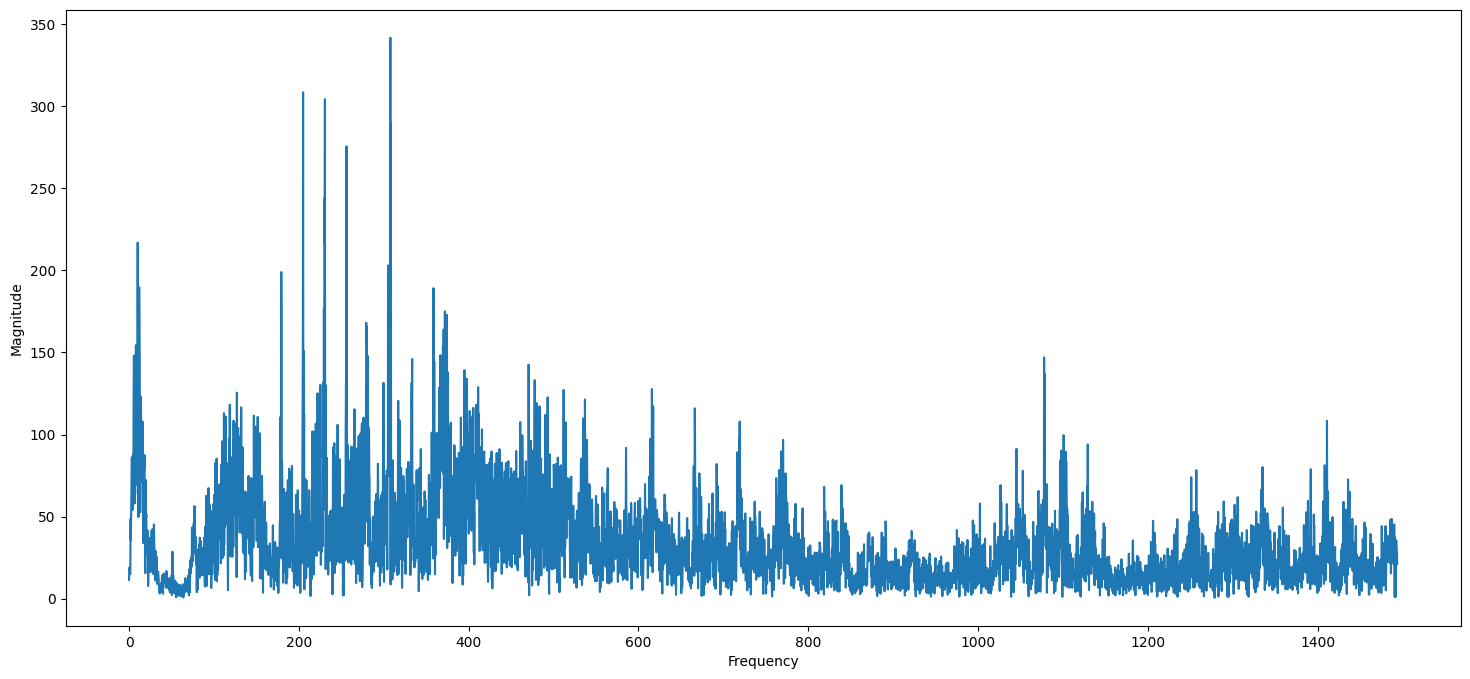

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000],magnitude[:5000])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
len(jack)
d =  1 / sr
d

4.5351473922902495e-05

In [ ]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [ ]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

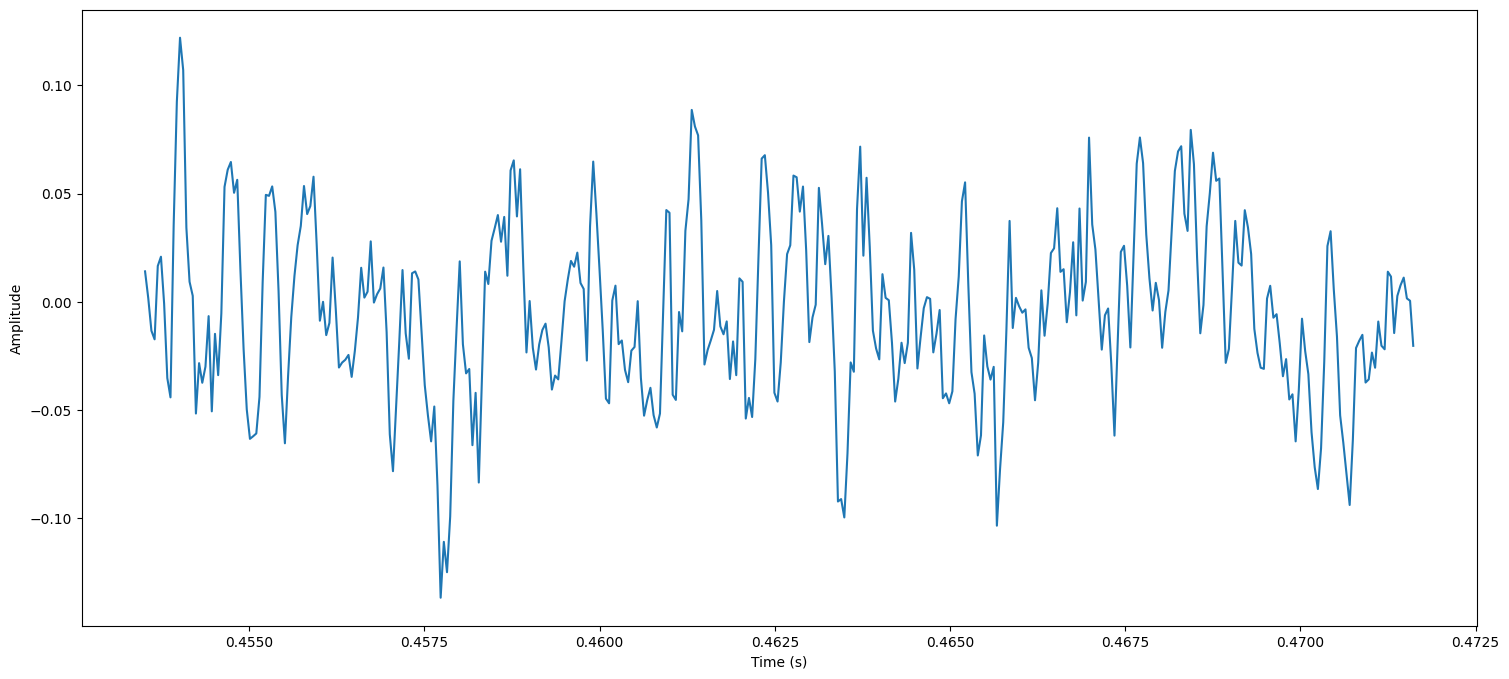

In [ ]:
samples = range(len(jack))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], jack[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

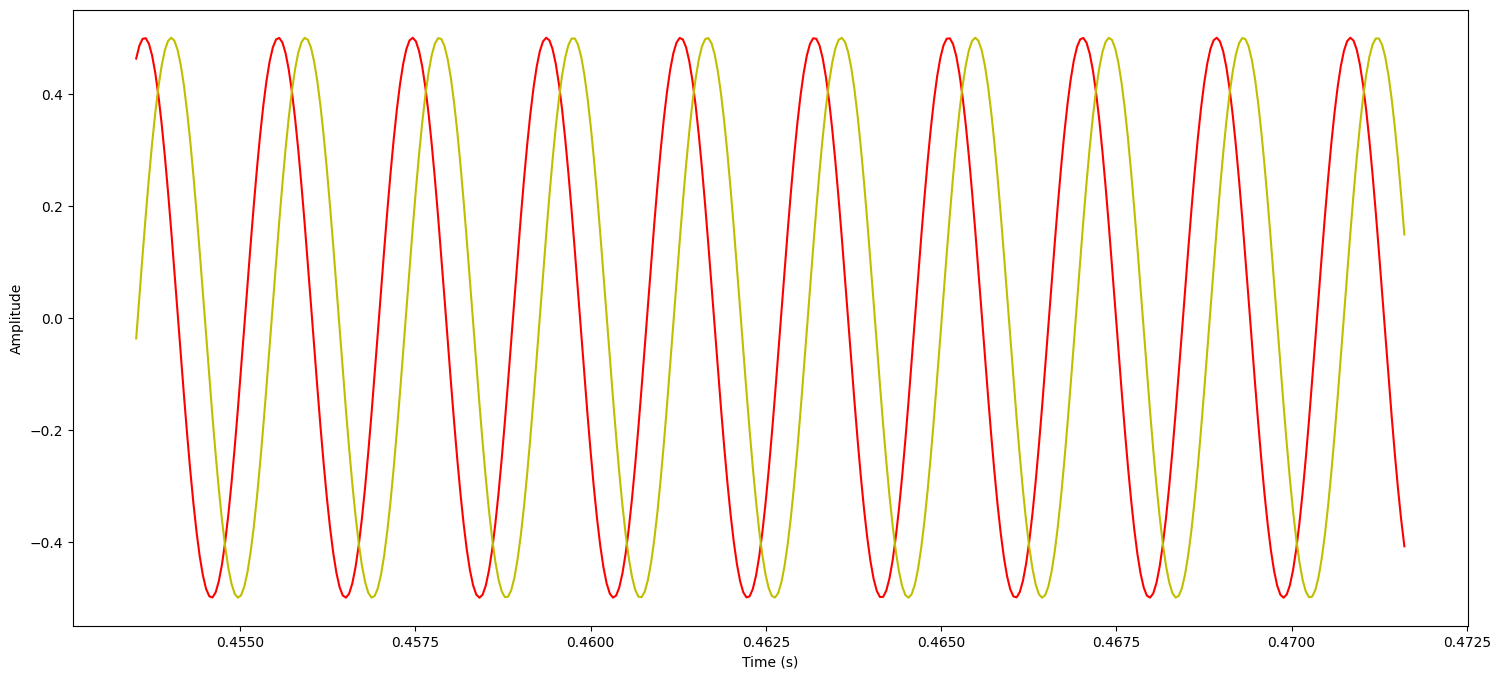

In [ ]:
f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

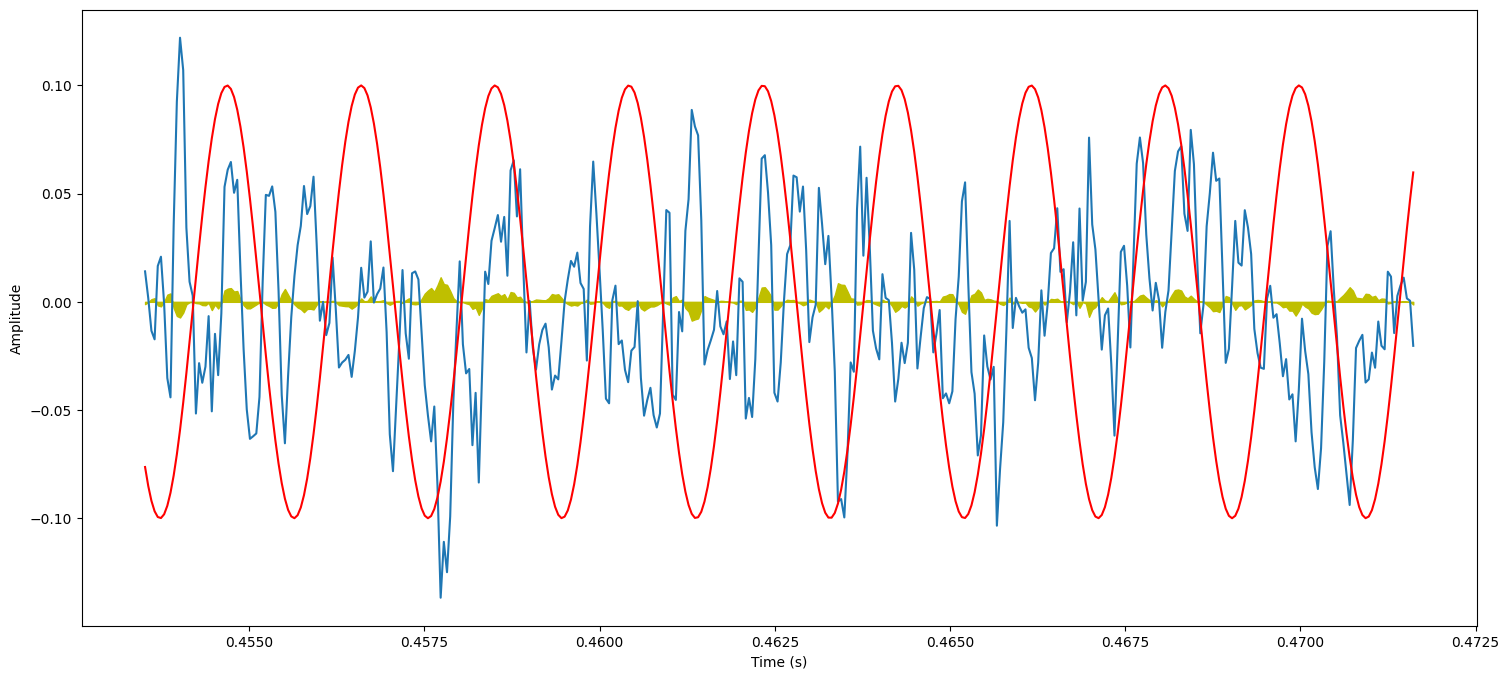

In [ ]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], jack[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*jack[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

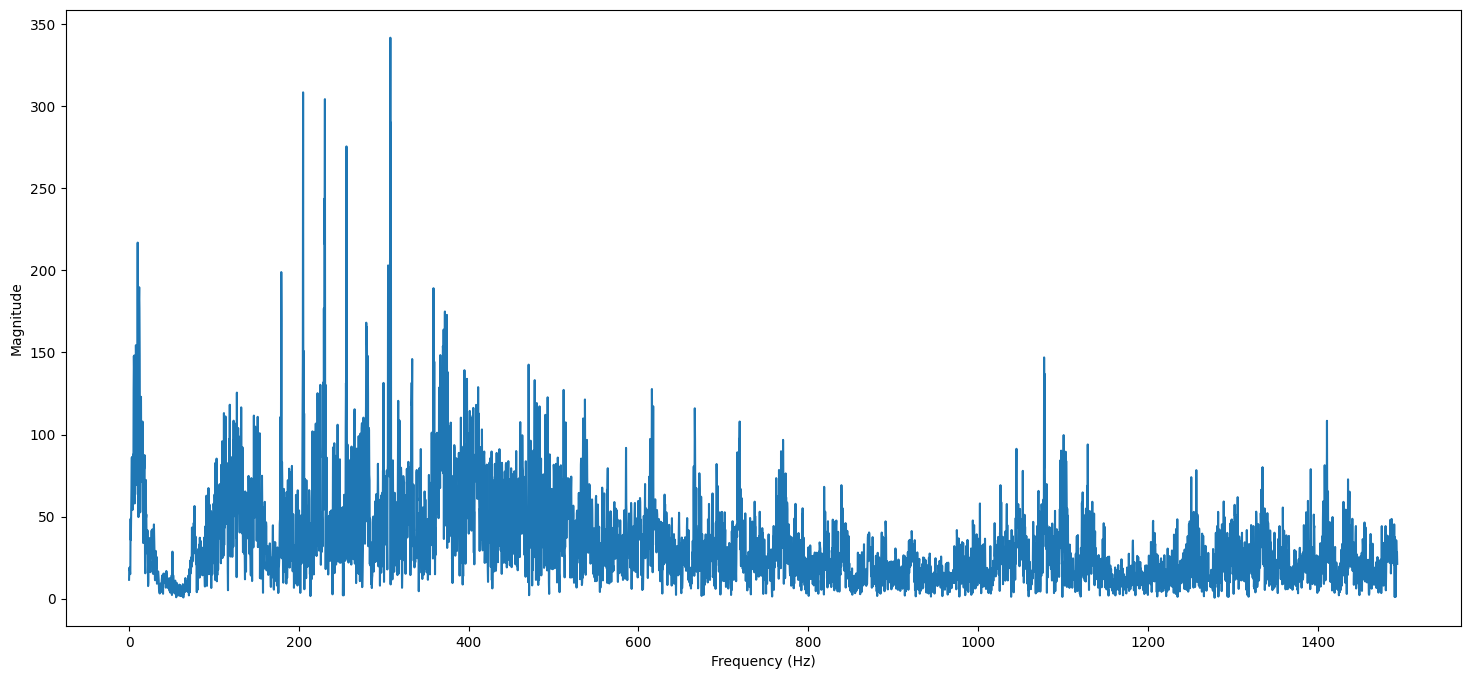

In [ ]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

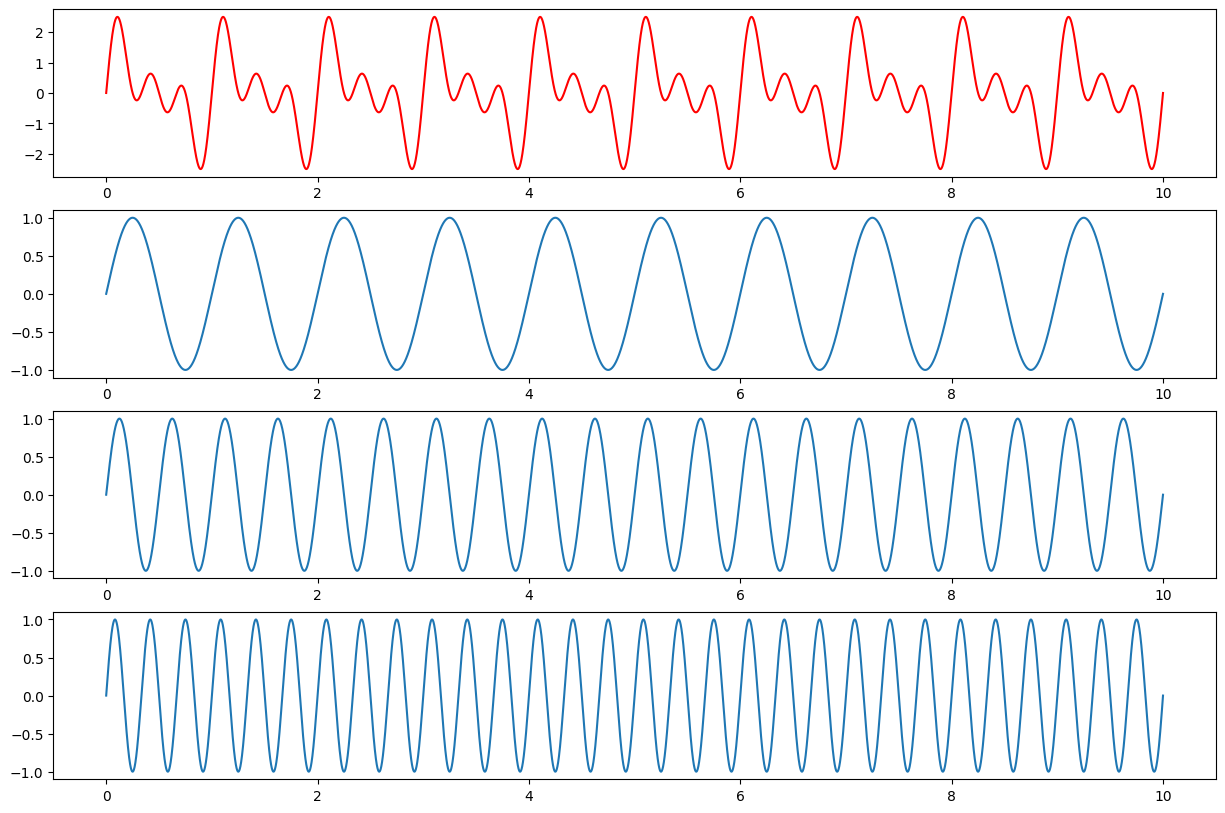

In [ ]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()

Mel spectrograms

In [ ]:
scale_file="/content/scale.wav"

In [ ]:
ipd.Audio(scale_file)

In [ ]:
#load audio file
scale,sr=librosa.load(scale_file)

In [ ]:
#mel filter banks
filter_banks=librosa.filters.mel(n_fft=2048,sr=22050,n_mels=10)

In [ ]:
filter_banks.shape

(10, 1025)

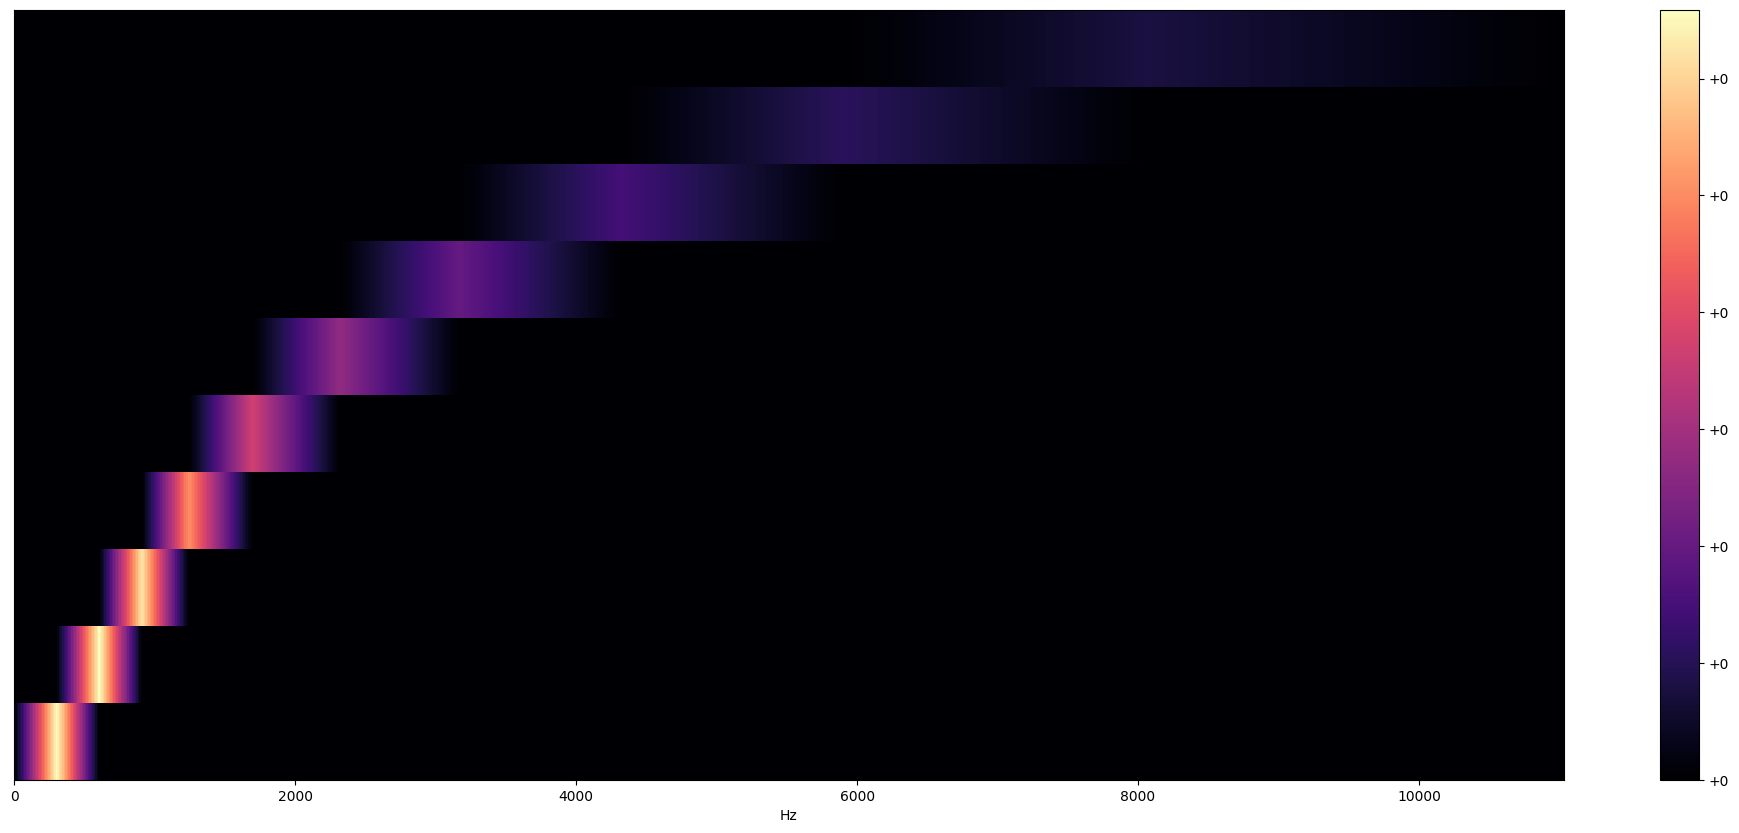

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,sr=sr,x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
#extracting mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [ ]:
mel_spectrogram.shape

(10, 342)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape


(10, 342)

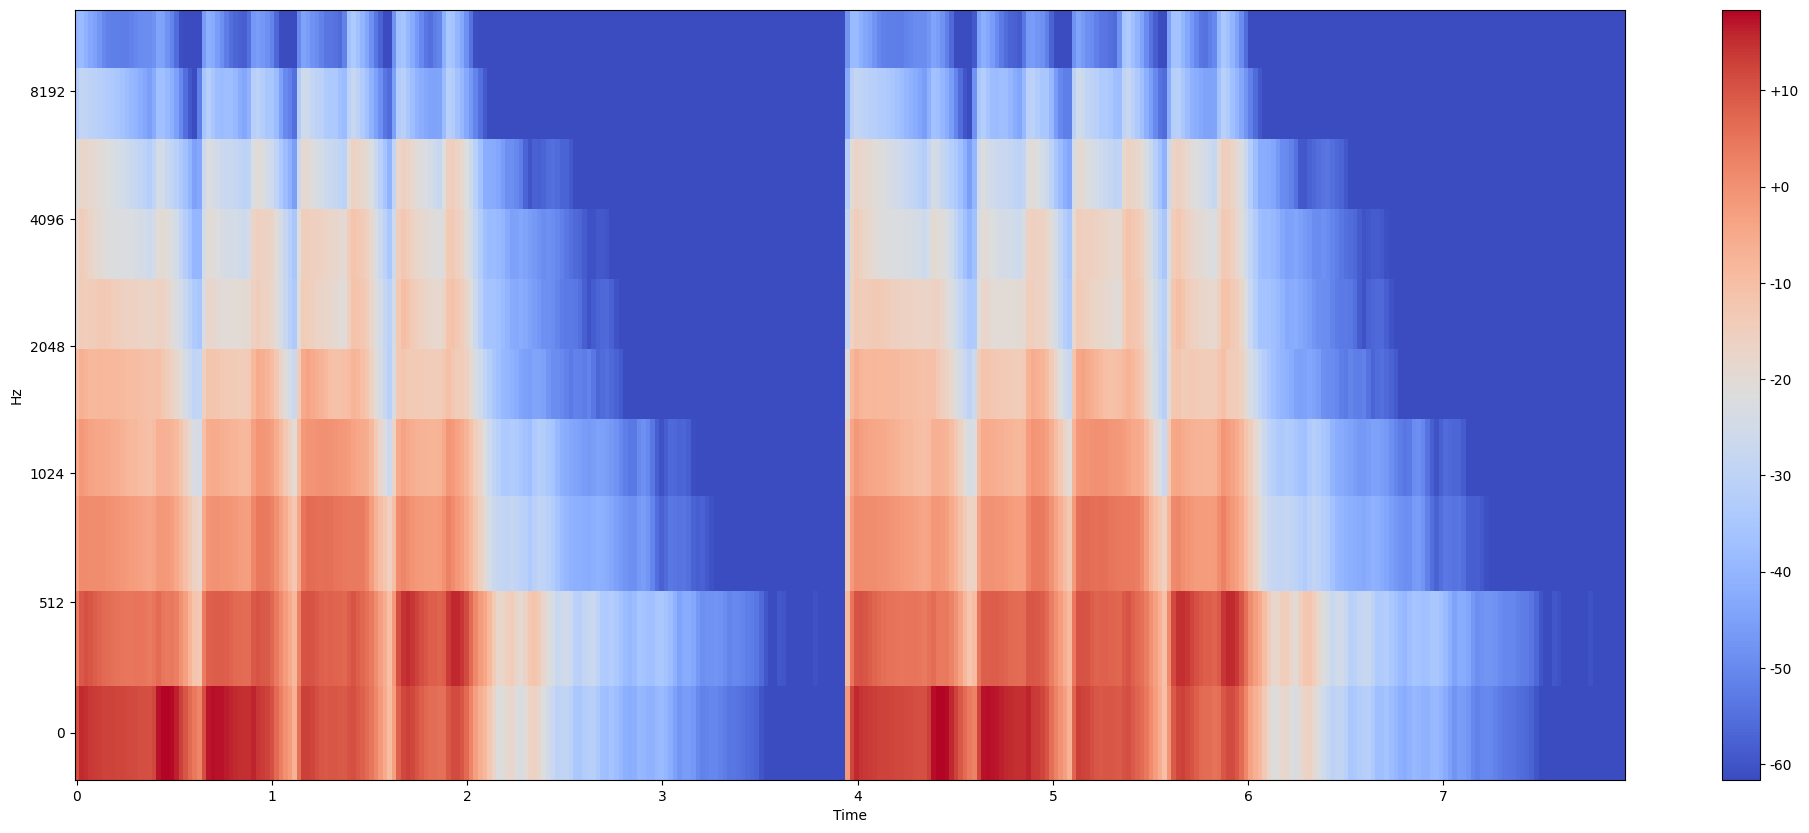

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

MFCCs

In [ ]:
mfccs = librosa.feature.mfcc(y=scale, n_mfcc=13, sr=sr)
mfccs.shape

(13, 342)

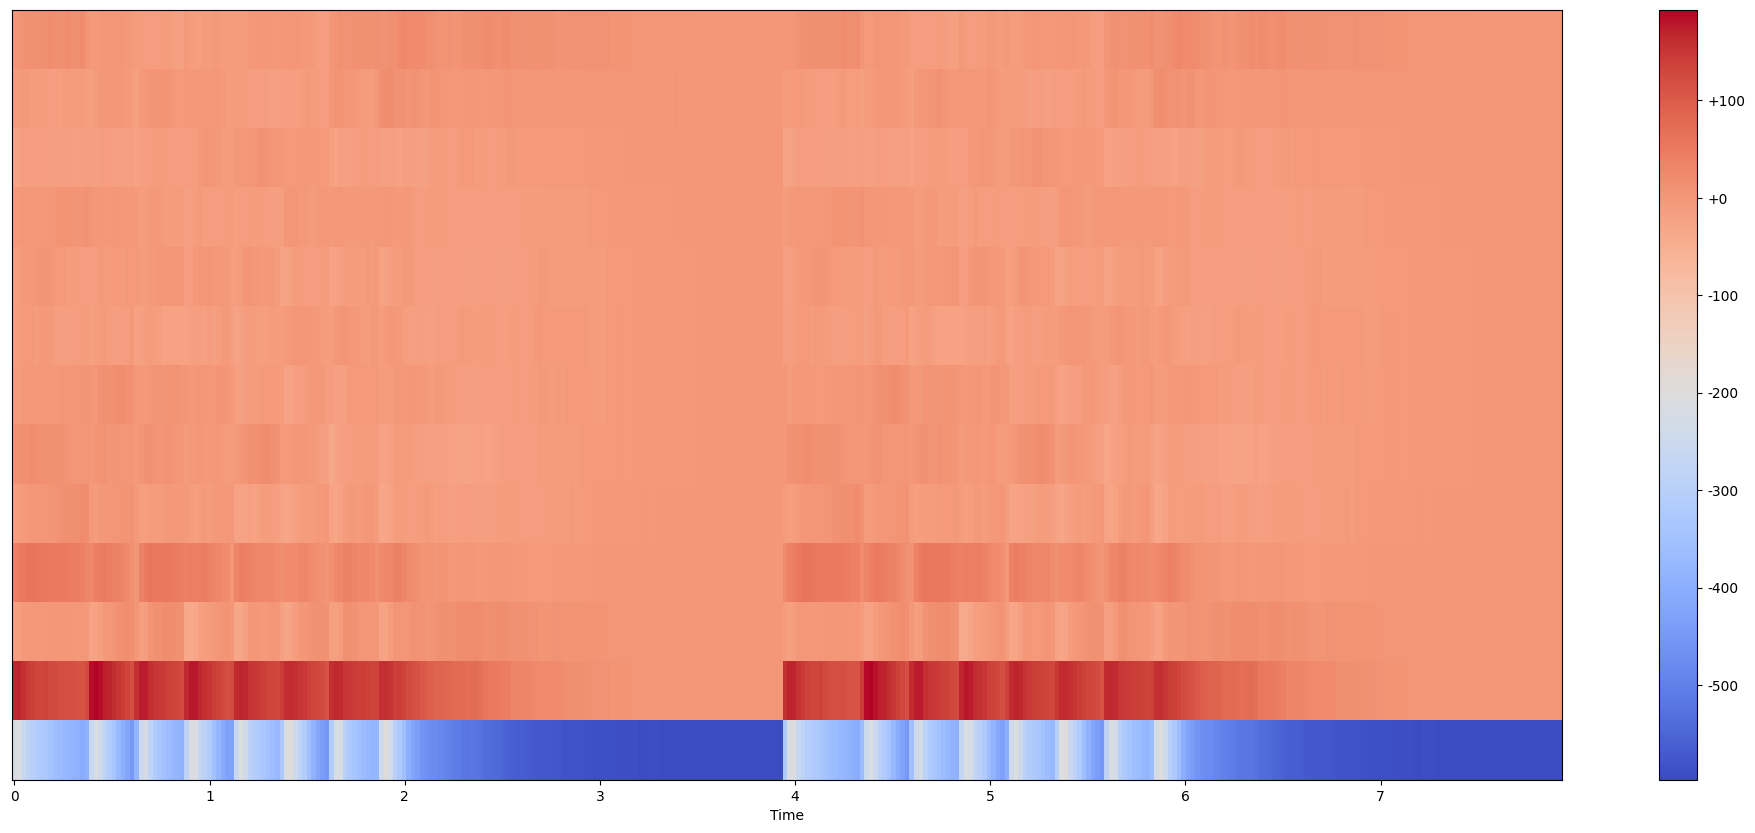

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
#extracting first,second mfccs derv
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [ ]:
delta_mfccs.shape

(13, 342)

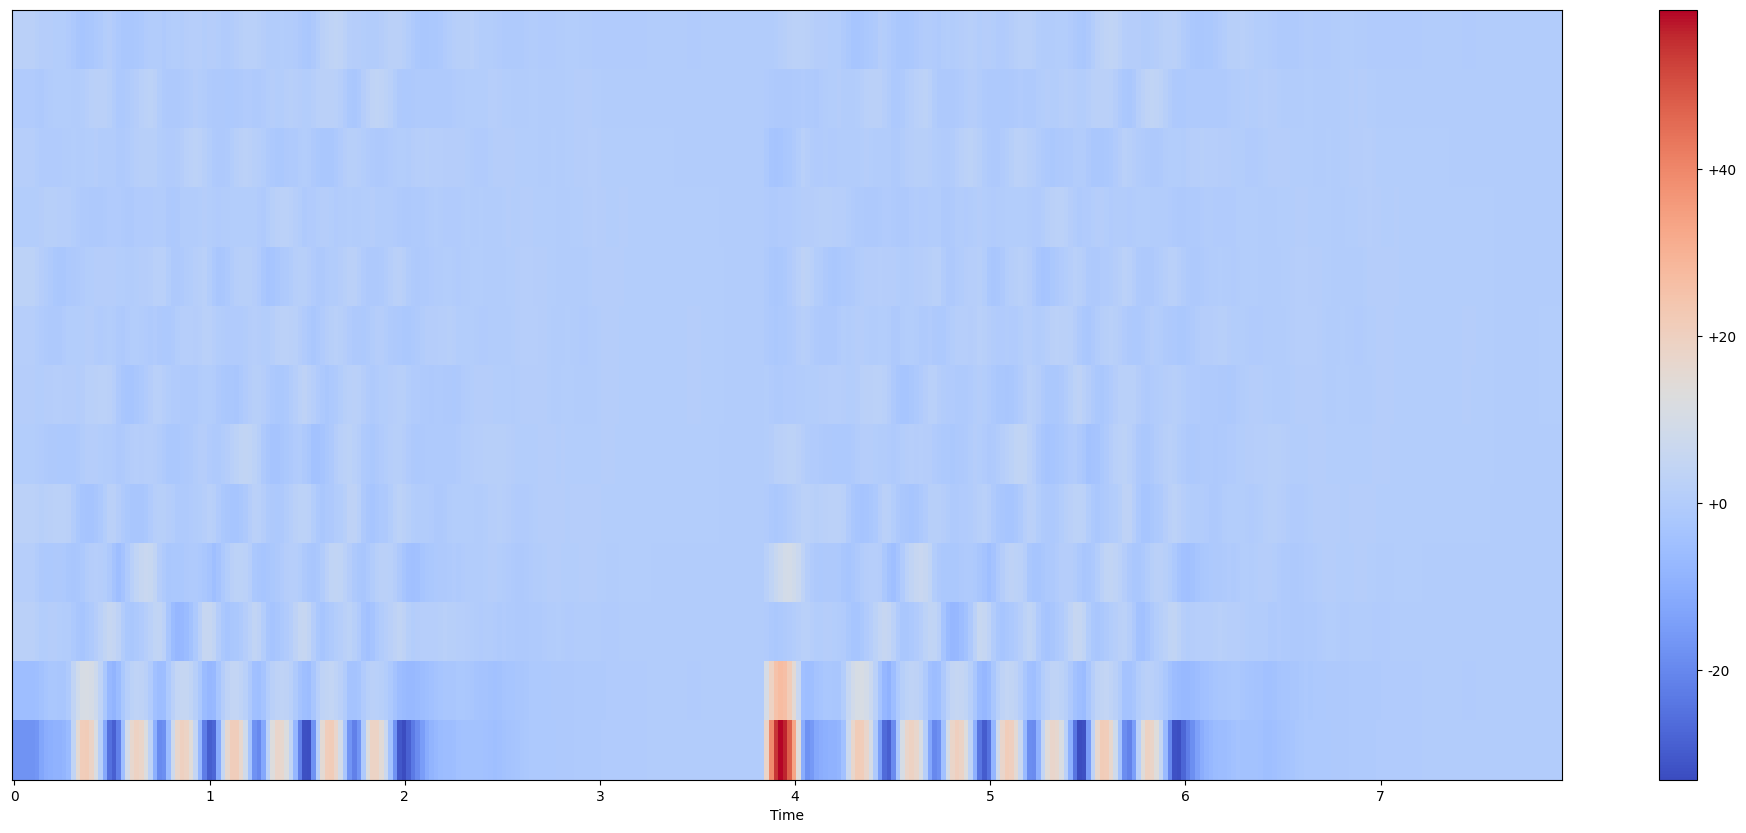

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

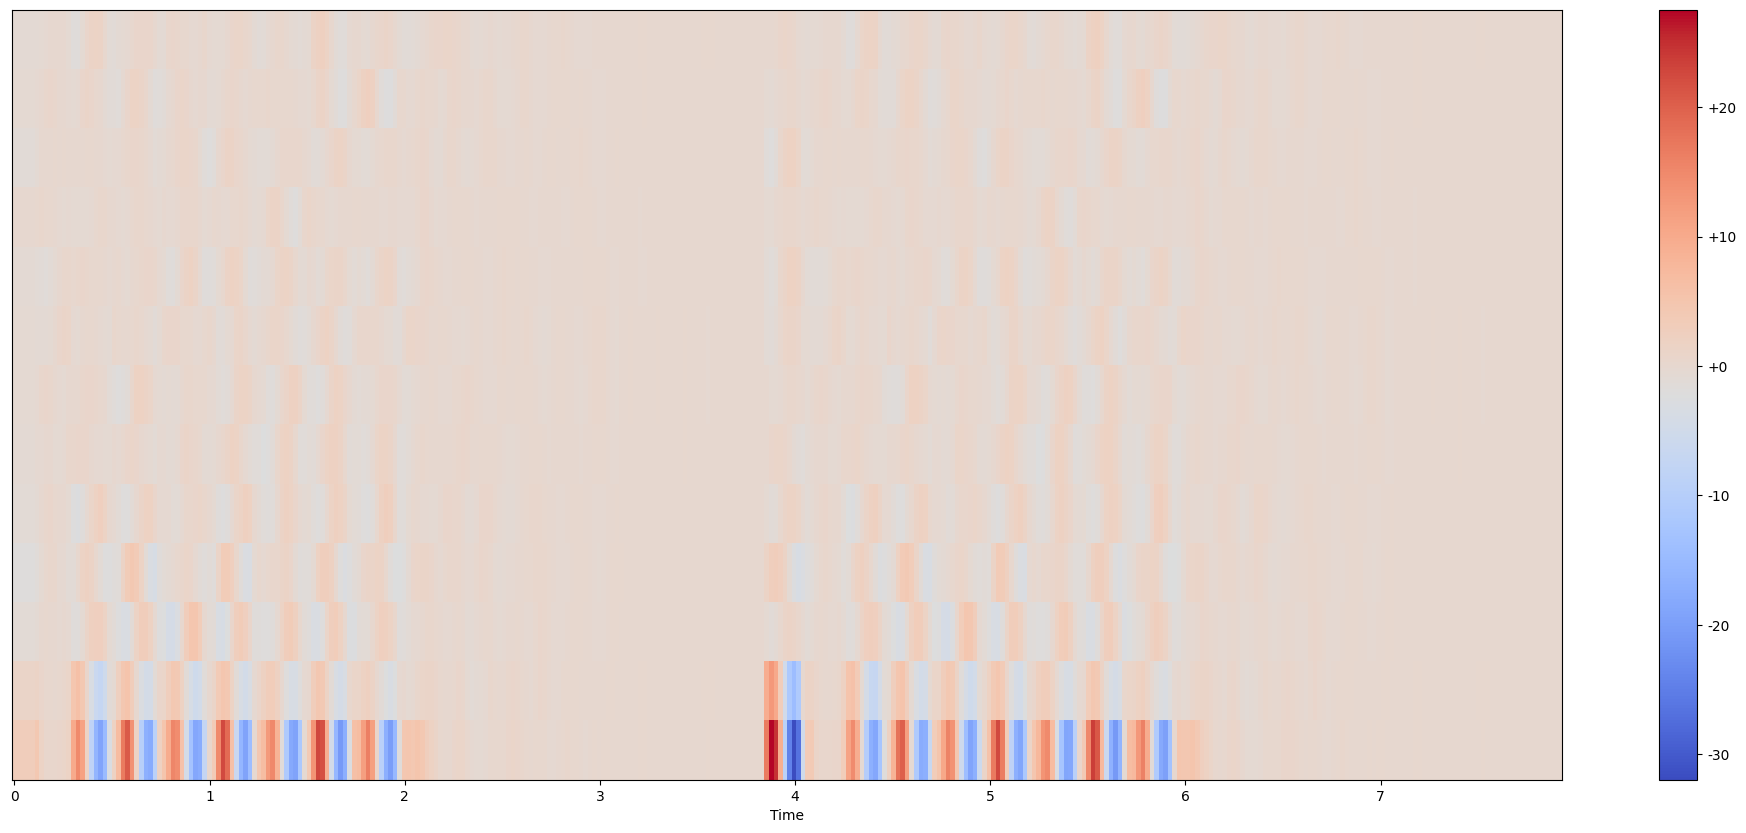

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [ ]:
mfccs_features.shape

(39, 342)

Spectral centroid

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
sc_scale=librosa.feature.spectral_centroid(y=scale, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_scale.shape

(342,)

In [ ]:
frames=range(len(sc_scale))
t=librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
len(t)


342

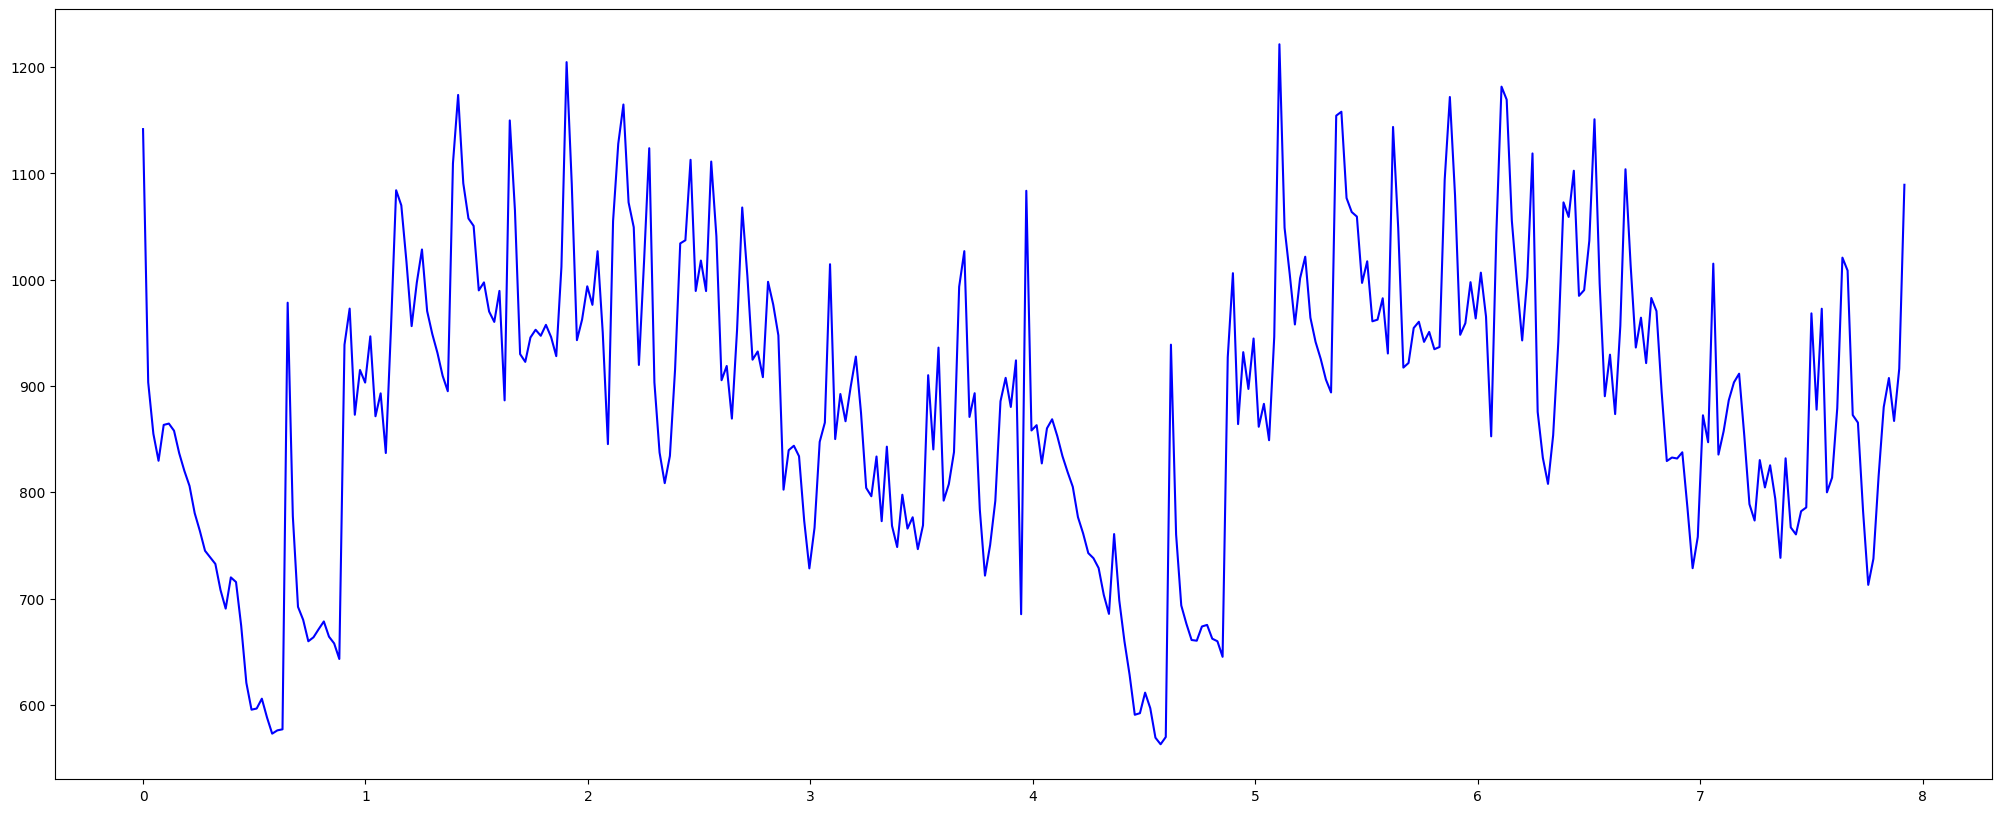

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_scale, color='b')

plt.show()

Spectral bandwidth

In [ ]:
ban_scale = librosa.feature.spectral_bandwidth(y=scale, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
ban_scale.shape

(342,)

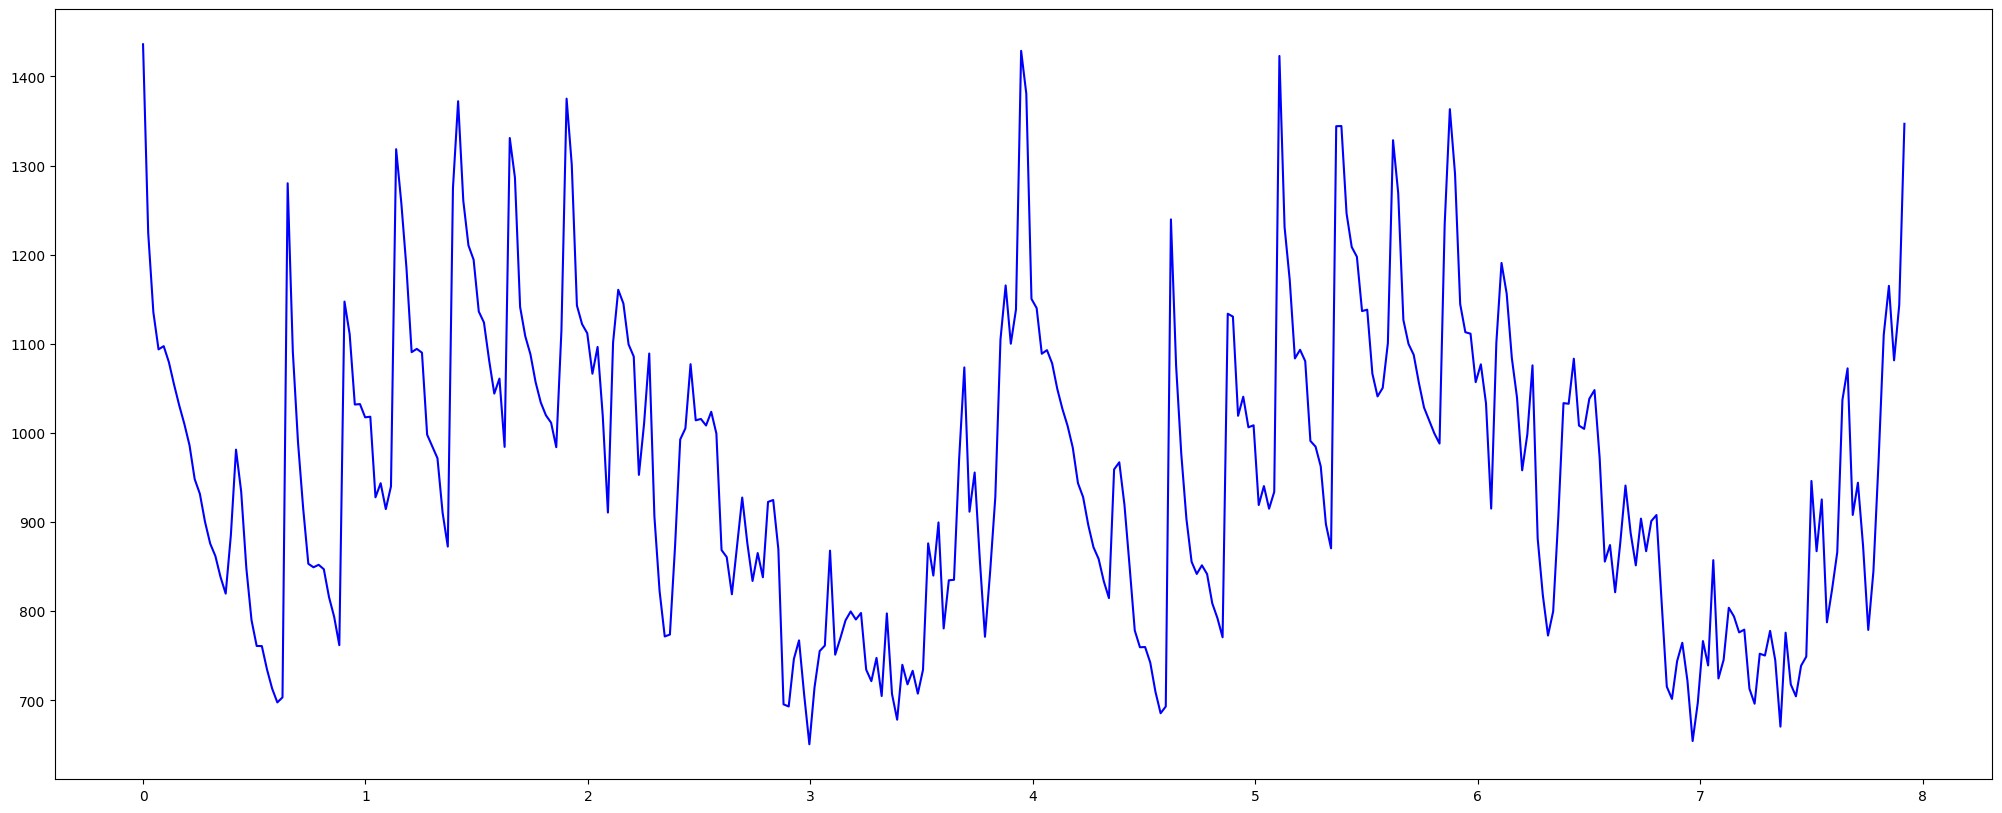

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_scale, color='b')

plt.show()

Extracting embeddings

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00


In [ ]:
import soundfile as sf
import librosa
import torch
from transformers import Wav2Vec2Model,Wav2Vec2Tokenizer

In [ ]:
tokenizer=Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model=Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:792: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_values=tokenizer(scale,return_tensors="pt").input_values
logits=model(input_values).extract_features
predicted_ids=torch.argmax(logits,dim=-1)
text=tokenizer.batch_decode(predicted_ids)[0]

In [ ]:
o=model(input_values,output_hidden_states=True)
o.keys()

odict_keys(['last_hidden_state', 'extract_features', 'hidden_states'])

In [ ]:
o['hidden_states']

(tensor([[[ 2.6837e-01,  2.6686e-02,  3.2983e-01,  ..., -6.2522e-01,
           -1.9989e-01, -8.0561e-01],
          [ 2.2607e-01, -6.8690e-01, -7.7499e-02,  ...,  4.7356e-01,
            2.4376e-01,  2.8092e-01],
          [-3.5522e-01, -4.0159e-01,  1.3471e-02,  ...,  5.2008e-01,
            3.6613e-01,  4.0344e-01],
          ...,
          [-3.0165e-01, -4.5797e-01,  3.0829e-01,  ..., -3.1504e-01,
            8.6290e-05,  8.2064e-02],
          [-3.3896e-01, -3.9177e-01,  2.3880e-01,  ..., -3.5220e-01,
            1.3195e-02,  1.3949e-02],
          [-2.8332e-01, -3.5241e-01,  2.0253e-01,  ..., -3.1999e-01,
            3.5776e-02, -3.6767e-02]]], grad_fn=<NativeLayerNormBackward0>),
 tensor([[[ 0.3283, -0.0795,  0.1066,  ..., -0.4234, -0.1503, -0.4796],
          [ 0.2883, -0.2057, -0.0181,  ...,  0.1648, -0.1380, -0.0397],
          [ 0.1380, -0.0360,  0.0525,  ...,  0.3071, -0.0901,  0.0886],
          ...,
          [-0.1662, -0.0427, -0.0454,  ...,  0.0090, -0.0987, -0.1809],
 

In [ ]:
o['last_hidden_state']

tensor([[[ 0.0224,  0.0480, -0.1286,  ..., -0.3109, -0.0014,  0.1225],
         [ 0.0772,  0.0501, -0.0741,  ..., -0.3620, -0.0164,  0.0380],
         [ 0.0621,  0.0437, -0.0148,  ..., -0.3394, -0.0309, -0.0073],
         ...,
         [ 0.0201, -0.0359,  0.1796,  ..., -0.4583,  0.0613, -0.0847],
         [ 0.0219, -0.0321,  0.1784,  ..., -0.4647,  0.0601, -0.0781],
         [ 0.0214, -0.0295,  0.1805,  ..., -0.4687,  0.0590, -0.0742]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
hidden_states = o['last_hidden_state']
vector_length = hidden_states.shape[-1]
vector_length

768

In [ ]:
with torch.no_grad():
    outputs = model(input_values=input_values)

# Extract the hidden states
hidden_states = outputs.last_hidden_state

# Check the shape of the hidden states tensor
vector_length = hidden_states.shape[-1]

vector_length

768